In [1]:
# Initial imports

import os
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import numpy as np
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import hvplot.pandas

%matplotlib inline

In [2]:
# Load .env enviroment variables

load_dotenv()

True

In [3]:
# Set Alpaca API key and secret

alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object

alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    base_url="https://paper-api.alpaca.markets",
    api_version="v2")

In [4]:
# Get 10 years worth of historical data for WEAT, CORN, SOYB and WTI
# Format current date as ISO format

start_date1 = pd.Timestamp("2010-01-01", tz="America/New_York").isoformat()
end_date1 = pd.Timestamp("2012-12-31", tz="America/New_York").isoformat()

start_date2 = pd.Timestamp("2013-01-01", tz="America/New_York").isoformat()
end_date2 = pd.Timestamp("2015-12-31", tz="America/New_York").isoformat()

start_date3 = pd.Timestamp("2016-01-01", tz="America/New_York").isoformat()
end_date3 = pd.Timestamp("2020-01-01", tz="America/New_York").isoformat()


### We look at ETF Commodity: Wheat, Corn, Soybean and

### WTI (West Texas Initative), a Crude Oil Futures Contract


In [5]:
# Set the tickers

tickers = ["CORN", "WEAT", "SOYB", "WTI", ]

# Set timeframe to '1D' for Alpaca API

timeframe = "1D"

# Max limit of 1000 so we get 3 sets of date range data

# First set
df_etf_data1 = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date1,
    end = end_date1,
    limit=1000).df

# Second set
df_etf_data2 = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date2,
    end = end_date2,
    limit=1000
).df

# Third set
df_etf_data3 = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date3,
    end = end_date3,
    limit=1000
).df


In [6]:
# Concatenate the 3 sets of data into one DataFrame

df_etf_data = pd.concat([df_etf_data1,df_etf_data2, df_etf_data3])

# Convert to date value

df_etf_data.index = df_etf_data.index.date

# Display

df_etf_data.head()


CORN                       SOYB                       WEAT       \
           open high low close volume open high low close volume open high   
2010-01-04  NaN  NaN NaN   NaN    NaN  NaN  NaN NaN   NaN    NaN  NaN  NaN   
2010-01-05  NaN  NaN NaN   NaN    NaN  NaN  NaN NaN   NaN    NaN  NaN  NaN   
2010-01-06  NaN  NaN NaN   NaN    NaN  NaN  NaN NaN   NaN    NaN  NaN  NaN   
2010-01-07  NaN  NaN NaN   NaN    NaN  NaN  NaN NaN   NaN    NaN  NaN  NaN   
2010-01-08  NaN  NaN NaN   NaN    NaN  NaN  NaN NaN   NaN    NaN  NaN  NaN   

                               WTI                                  
           low close volume   open   high     low  close    volume  
2010-01-04 NaN   NaN    NaN  11.90  12.46  11.860  12.25  714062.0  
2010-01-05 NaN   NaN    NaN  12.30  12.63  12.170  12.32  586230.0  
2010-01-06 NaN   NaN    NaN  12.41  12.65  12.390  12.60  596097.0  
2010-01-07 NaN   NaN    NaN  12.60  12.70  12.240  12.45  551873.0  
2010-01-08 NaN   NaN    NaN  12.37  12.54  12.115  12.53  508047.0

### We also look at Crops Yield for Corn, SoyB, and Wheat

In [7]:
# Open Crops yield csv file

yields = Path('yields.csv')
crops = pd.read_csv(yields, parse_dates=True, index_col="Year", infer_datetime_format=True)
crops

,CORN YIELD,SOYBEAN YIELD,WHEAT YIELD
Year,,,
2010-01-01,152.6,43.5,46.1
2011-01-01,146.8,42.0,43.6
2012-01-01,123.1,40.0,46.2
2013-01-01,158.1,44.0,47.1
2014-01-01,171.0,47.5,43.7
2015-01-01,168.4,48.0,43.6
2016-01-01,174.6,51.9,52.7
2017-01-01,176.6,49.3,46.4
2018-01-01,176.4,50.6,47.6


In [8]:
# Concatenate ETF Commodities and Crops Yield

etf_crops = pd.concat([df_etf_data, crops], axis = 'columns')

# Convert the Date column to datetime type

etf_crops.index = pd.to_datetime(etf_crops.index, infer_datetime_format=True)
etf_crops.tail()

,"(CORN, open)","(CORN, high)","(CORN, low)","(CORN, close)","(CORN, volume)","(SOYB, open)","(SOYB, high)","(SOYB, low)","(SOYB, close)","(SOYB, volume)",...,"(WEAT, close)","(WEAT, volume)","(WTI, open)","(WTI, high)","(WTI, low)","(WTI, close)","(WTI, volume)",CORN YIELD,SOYBEAN YIELD,WHEAT YIELD
2016-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,174.6,51.9,52.7
2017-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,176.6,49.3,46.4
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,176.4,50.6,47.6
2019-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,167.5,47.4,51.7
2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,172.0,50.2,49.7


In [9]:
# Create DataFrame

df_etf_crops = pd.DataFrame()

# Rename the headers to the corresponding ticker

df_etf_crops["CORN ETF"] = etf_crops['CORN','close']
df_etf_crops["WEAT ETF"] = etf_crops['WEAT','close']
df_etf_crops["SOYB ETF"] = etf_crops['SOYB','close']
df_etf_crops["WTI ETF"] = etf_crops['WTI','close']
df_etf_crops["CORN YIELD"] = etf_crops['CORN YIELD']
df_etf_crops['SOYB YIELD'] = etf_crops['SOYBEAN YIELD']
df_etf_crops['WEAT YIELD'] = etf_crops['WHEAT YIELD']

# Display DataFrame

df_etf_crops.head()

,CORN ETF,WEAT ETF,SOYB ETF,WTI ETF,CORN YIELD,SOYB YIELD,WEAT YIELD
2010-01-04,NaN,NaN,NaN,12.25,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,12.32,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN,12.60,NaN,NaN,NaN
2010-01-07,NaN,NaN,NaN,12.45,NaN,NaN,NaN
2010-01-08,NaN,NaN,NaN,12.53,NaN,NaN,NaN


In [10]:
# Downsample ETF Commodity and Crops Yield data to yearly average

yearly_avg = df_etf_crops.resample('Y').mean()
yearly_avg

,CORN ETF,WEAT ETF,SOYB ETF,WTI ETF,CORN YIELD,SOYB YIELD,WEAT YIELD
2010-12-31,31.829223,NaN,NaN,10.907207,152.6,43.5,46.1
2011-12-31,43.443108,22.308211,22.066292,21.340485,146.8,42.0,43.6
2012-12-31,43.732135,22.266986,24.584792,18.611500,123.1,40.0,46.2
2013-12-31,38.013712,17.819576,23.720769,15.999960,158.1,44.0,47.1
2014-12-31,29.108357,13.787557,22.862532,13.504979,171.0,47.5,43.7
2015-12-31,23.881465,10.401119,18.897996,4.601231,168.4,48.0,43.6
2016-12-31,20.201310,8.120455,18.983233,1.989990,174.6,51.9,52.7
2017-12-31,18.386711,6.834469,18.536088,2.565633,176.6,49.3,46.4
2018-12-31,16.872695,6.411783,17.266342,6.096498,176.4,50.6,47.6
2019-12-31,15.559280,5.475478,15.619875,4.952146,167.5,47.4,51.7


In [11]:
# Calculate percentage change over year and drop NAs

pct_chg = yearly_avg.pct_change().dropna()
pct_chg

,CORN ETF,WEAT ETF,SOYB ETF,WTI ETF,CORN YIELD,SOYB YIELD,WEAT YIELD
2012-12-31,0.006653,-0.001848,0.114133,-0.127878,-0.161444,-0.047619,0.059633
2013-12-31,-0.130760,-0.199731,-0.035145,-0.140319,0.284322,0.100000,0.019481
2014-12-31,-0.234267,-0.226269,-0.036181,-0.155937,0.081594,0.079545,-0.072187
2015-12-31,-0.179567,-0.245616,-0.173408,-0.659294,-0.015205,0.010526,-0.002288
2016-12-31,-0.154101,-0.219271,0.004510,-0.567509,0.036817,0.081250,0.208716
2017-12-31,-0.089826,-0.158364,-0.023555,0.289269,0.011455,-0.050096,-0.119545
2018-12-31,-0.082343,-0.061846,-0.068501,1.376216,-0.001133,0.026369,0.025862
2019-12-31,-0.077843,-0.146029,-0.095357,-0.187706,-0.050454,-0.063241,0.086134
2020-12-31,0.000000,0.000000,0.000000,0.000000,0.026866,0.059072,-0.038685


In [12]:
# Calculate descriptives

pct_chg.describe()

,CORN ETF,WEAT ETF,SOYB ETF,WTI ETF,CORN YIELD,SOYB YIELD,WEAT YIELD
count,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000
mean,-0.104673,-0.139886,-0.034834,-0.019240,0.023646,0.021756,0.018569
std,0.079306,0.095927,0.078327,0.594416,0.119119,0.062989,0.095842
min,-0.234267,-0.245616,-0.173408,-0.659294,-0.161444,-0.063241,-0.119545
25%,-0.154101,-0.219271,-0.068501,-0.187706,-0.015205,-0.047619,-0.038685
50%,-0.089826,-0.158364,-0.035145,-0.140319,0.011455,0.026369,0.019481
75%,-0.077843,-0.061846,0.000000,0.000000,0.036817,0.079545,0.059633
max,0.006653,0.000000,0.114133,1.376216,0.284322,0.100000,0.208716


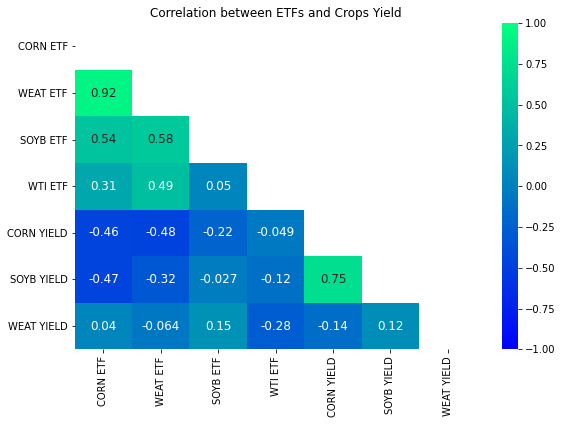

In [13]:
# Calculate the correlation between ETFs and Crops Yield

correlation = pct_chg.corr()

# Create a filter array to show triangle heatmap

mask = np.zeros_like(correlation)
triangle_indices = np.triu_indices_from(mask)
mask[triangle_indices] = True

# Display correlation using heatmap

plt.figure(figsize=(9,6))
sns.heatmap(correlation, mask = mask, annot = True, cmap = 'winter', annot_kws = {'size': 12}, vmin = -1, vmax = 1)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('Correlation between ETFs and Crops Yield')
plt.show()

In [14]:
# Plot Interactive chart using hvplot to show correlation

correlation.hvplot(title = 'Interactive Correlation Chart', legend = ('left'))

:NdOverlay   [Variable]
   :Curve   [index]   (value)

# Performance Analysis for ETF Commodity

In [15]:
# Display ETF commodity to prepare data cleaning process

df_etf_data.head()

CORN                       SOYB                       WEAT       \
           open high low close volume open high low close volume open high   
2010-01-04  NaN  NaN NaN   NaN    NaN  NaN  NaN NaN   NaN    NaN  NaN  NaN   
2010-01-05  NaN  NaN NaN   NaN    NaN  NaN  NaN NaN   NaN    NaN  NaN  NaN   
2010-01-06  NaN  NaN NaN   NaN    NaN  NaN  NaN NaN   NaN    NaN  NaN  NaN   
2010-01-07  NaN  NaN NaN   NaN    NaN  NaN  NaN NaN   NaN    NaN  NaN  NaN   
2010-01-08  NaN  NaN NaN   NaN    NaN  NaN  NaN NaN   NaN    NaN  NaN  NaN   

                               WTI                                  
           low close volume   open   high     low  close    volume  
2010-01-04 NaN   NaN    NaN  11.90  12.46  11.860  12.25  714062.0  
2010-01-05 NaN   NaN    NaN  12.30  12.63  12.170  12.32  586230.0  
2010-01-06 NaN   NaN    NaN  12.41  12.65  12.390  12.60  596097.0  
2010-01-07 NaN   NaN    NaN  12.60  12.70  12.240  12.45  551873.0  
2010-01-08 NaN   NaN    NaN  12.37  12.54  12.115  12.53  508047.0

### Data cleaning

In [16]:
# Count nulls

df_etf_data.isnull().sum()

CORN  open      110
      high      110
      low       110
      close     110
      volume    110
SOYB  open      450
      high      450
      low       450
      close     450
      volume    450
WEAT  open      440
      high      440
      low       440
      close     440
      volume    440
WTI   open        2
      high        2
      low         2
      close       2
      volume      2
dtype: int64

In [17]:
# Drop nulls

df_etf_data.dropna(inplace=True)
df_etf_data.isnull().sum()

CORN  open      0
      high      0
      low       0
      close     0
      volume    0
SOYB  open      0
      high      0
      low       0
      close     0
      volume    0
WEAT  open      0
      high      0
      low       0
      close     0
      volume    0
WTI   open      0
      high      0
      low       0
      close     0
      volume    0
dtype: int64

In [18]:
# Convert to date value (gets rid of closing time date e.g. 16:00) but this operation tends to convert the date type to object type
#df_etf_data.index = df_etf_data.index.date

# Convert the Date column back to datetime type
df_etf_data.index = pd.to_datetime(df_etf_data.index, infer_datetime_format=True)

# Sort by index (Date)
df_etf_data = df_etf_data.sort_index()


# Create DataFrame
df_etf_closing_prices = pd.DataFrame()
df_crude_closing_prices = pd.DataFrame()

# Rename the headers to the corresponding ticker
df_etf_closing_prices["CORN ETF"] = df_etf_data['CORN']['close']
df_etf_closing_prices["WEAT ETF"] = df_etf_data['WEAT']['close']
df_etf_closing_prices["SOYB ETF"] = df_etf_data['SOYB']['close']
df_crude_closing_prices["WTI ETF"] = df_etf_data['WTI']['close']

# Preview DataFrame
display(df_etf_closing_prices.head(),df_crude_closing_prices.head())

,CORN ETF,WEAT ETF,SOYB ETF
2011-09-19,45.65,24.57,24.55
2011-09-20,45.54,24.87,25.08
2011-09-21,44.80,24.23,24.34
2011-09-22,42.99,23.00,24.00
2011-09-23,42.45,23.56,23.00


,WTI ETF
2011-09-19,18.72
2011-09-20,17.92
2011-09-21,16.80
2011-09-22,15.13
2011-09-23,14.19


In [19]:
# Calculate daily returns for all Commodities

etf_daily_returns = df_etf_closing_prices.pct_change()
crude_daily_returns = df_crude_closing_prices.pct_change()

# Drop NAs

etf_daily_returns.dropna(inplace=True)
crude_daily_returns.dropna(inplace=True)

# Concatenate all Commodities

commodity_returns = pd.concat([etf_daily_returns, crude_daily_returns], axis = 'columns')
commodity_returns.head()

,CORN ETF,WEAT ETF,SOYB ETF,WTI ETF
2011-09-20,-0.002410,0.012210,0.021589,-0.042735
2011-09-21,-0.016249,-0.025734,-0.029506,-0.062500
2011-09-22,-0.040402,-0.050764,-0.013969,-0.099405
2011-09-23,-0.012561,0.024348,-0.041667,-0.062128
2011-09-26,0.017903,0.001273,0.020000,0.068358


<AxesSubplot:title={'center':'Daily Returns'}>

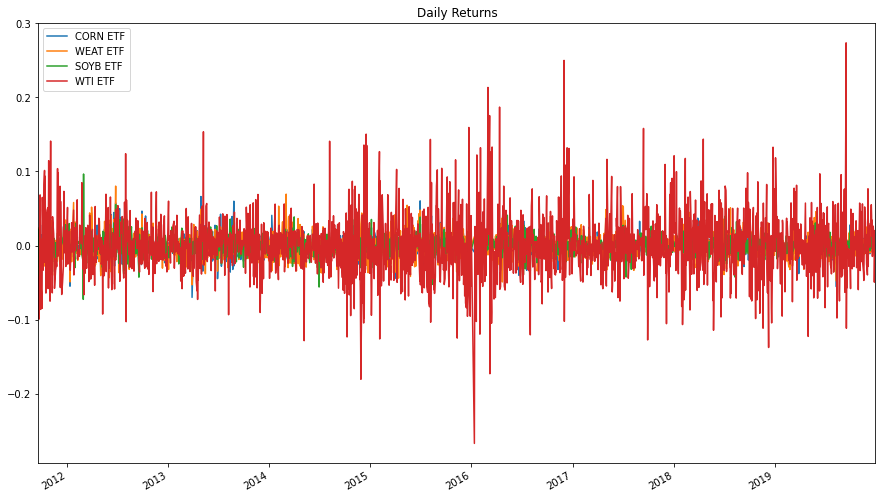

In [20]:
# Plot Daily Returns

commodity_returns.plot(figsize=(15,9), title = 'Daily Returns')

<AxesSubplot:title={'center':'Cumulative Returns'}>

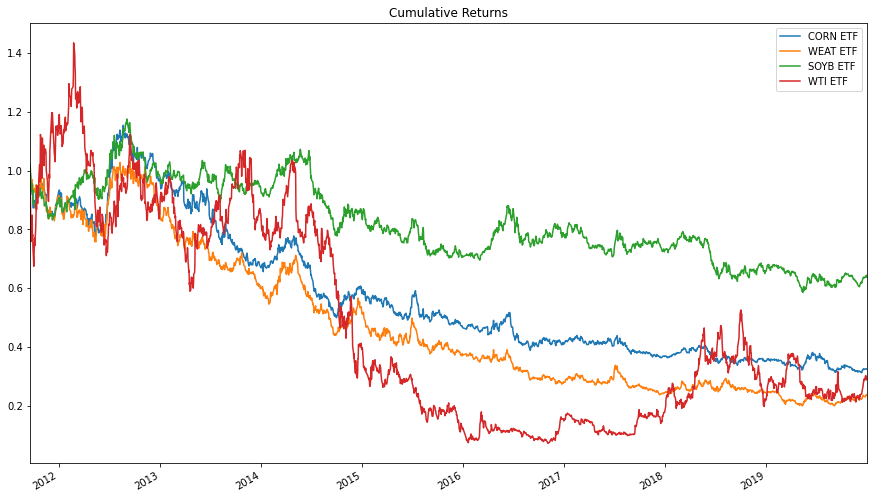

In [21]:
# Calculate cumulative returns of all commodities

cumulative_returns = (1+commodity_returns).cumprod()

# Plot cumulative returns for the commodities

cumulative_returns.plot(figsize=(15,9), title= 'Cumulative Returns')

## Risk Analysis

<AxesSubplot:title={'center':'Commodity Risk'}>

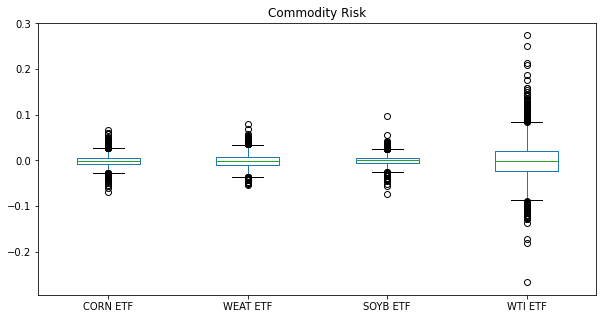

In [22]:
# Box plot to visually show risk

commodity_returns.plot.box(figsize = (10,5), title = "Commodity Risk")

### Calculate Standard Deviations

In [23]:
# Calculate the daily standard deviation for all commodities

daily_std = pd.DataFrame(commodity_returns.std()).rename(columns = {0:'DAILY STD'})
daily_std

,DAILY STD
CORN ETF,0.012645
WEAT ETF,0.015256
SOYB ETF,0.011657
WTI ETF,0.042183


In [24]:
# Calculate the annualized standard deviation (252 trading days)

annualized_std = daily_std.rename(columns = {"DAILY STD": "ANNUALIZED STD"}) * np.sqrt(252)
annualized_std

,ANNUALIZED STD
CORN ETF,0.200735
WEAT ETF,0.242187
SOYB ETF,0.185055
WTI ETF,0.669640


### Rolling Statistics

<AxesSubplot:title={'center':'Exponentially Weighted Moving Average'}>

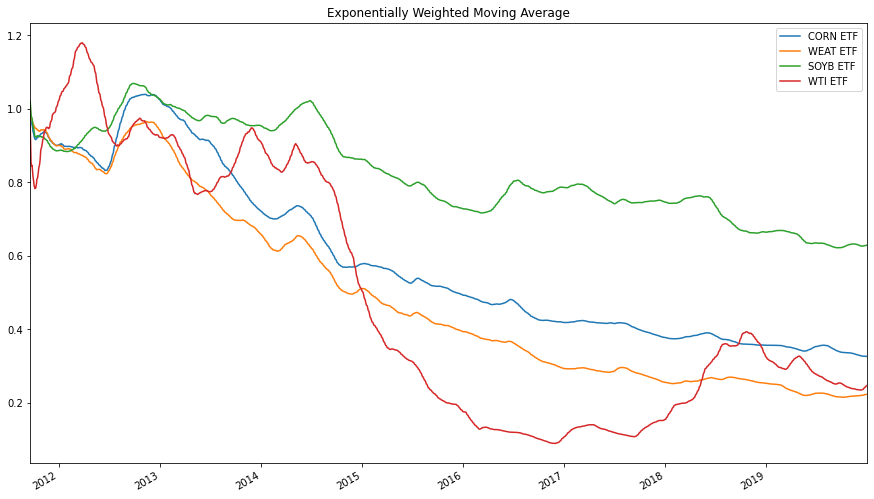

In [25]:
# Calculate and plot Exponentially Weighted Moving Average(30-day half life)

cumulative_returns.ewm(halflife = 30).mean().plot(figsize = (15,9), title = "Exponentially Weighted Moving Average")

### Generate descriptive statistics for all commodities

In [26]:
# Calculate descriptive statistics

cumulative_returns.describe()

,CORN ETF,WEAT ETF,SOYB ETF,WTI ETF
count,2054.000000,2054.000000,2054.000000,2054.000000
mean,0.572302,0.474984,0.818698,0.469061
std,0.225934,0.243233,0.132632,0.344092
min,0.311939,0.199430,0.585336,0.071581
25%,0.383571,0.267500,0.724236,0.172009
50%,0.493537,0.386445,0.789002,0.315705
75%,0.746988,0.670282,0.939114,0.806090
max,1.153777,1.031893,1.175153,1.434295


### Calculate and Plot the Correlation for Agriculture Commodity and Crude Oil Future

<AxesSubplot:>

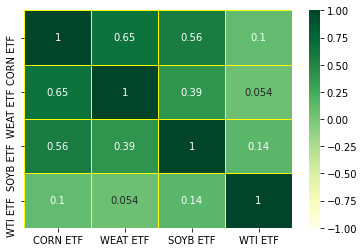

In [27]:
# Calculate correlation

correlation = commodity_returns.corr()

# Plot correlation using heatmap

sns.heatmap(correlation, cmap = 'YlGn', annot = True, vmin = -1, vmax = 1, linewidth = 0.5, linecolor = 'yellow')

### Calculate Sharpe Ratio

In [28]:
# Annualized Sharpe Ratio

sharpe_ratio = (commodity_returns.mean() * 252) / (commodity_returns.std() * np.sqrt(252))
sharpe_ratio

CORN ETF   -0.588161
WEAT ETF   -0.606001
SOYB ETF   -0.198491
WTI ETF     0.109531
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

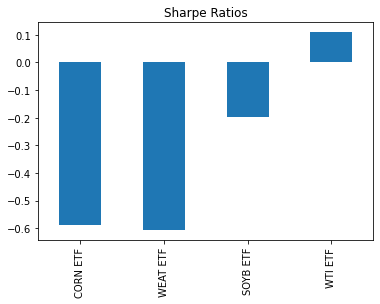

In [29]:
# Visualize the Sharpe Ratio as a bar plot

sharpe_ratio.plot(kind = 'bar', title = 'Sharpe Ratios')

# Monte Carlo Simulation Forecast for Commodities Portfolio

In [30]:
# Display the data for forecasting

df_etf_data.head()

CORN                                    SOYB                \
             open    high     low  close    volume   open   high    low   
2011-09-19  45.46  45.920  45.000  45.65  109916.0  24.55  24.55  24.55   
2011-09-20  46.11  46.719  45.370  45.54  116530.0  24.99  25.08  24.66   
2011-09-21  45.90  46.040  44.750  44.80   83248.0  24.96  25.11  24.34   
2011-09-22  43.96  44.670  42.648  42.99  327593.0  24.00  24.00  24.00   
2011-09-23  42.99  43.390  42.400  42.45  156966.0  24.43  24.43  23.00   

                            WEAT                                 WTI         \
            close  volume   open   high    low  close  volume   open   high   
2011-09-19  24.55   100.0  24.57  24.57  24.57  24.57   100.0  18.65  18.99   
2011-09-20  25.08  1200.0  24.68  24.87  24.57  24.87  1000.0  18.83  18.88   
2011-09-21  24.34  4365.0  24.41  24.68  24.23  24.23   300.0  17.94  18.42   
2011-09-22  24.00   100.0  23.71  23.71  23.00  23.00   695.0  15.84  16.10   
2011-09-23  23.00   300.0  23.32  23.56  23.28  23.56   300.0  14.99  15.63   

                                     
              low  close     volume  
2011-09-19  18.09  18.72   599063.0  
2011-09-20  17.89  17.92   543628.0  
2011-09-21  16.77  16.80   781972.0  
2011-09-22  14.50  15.13   755896.0  
2011-09-23  14.16  14.19  1150861.0

In [31]:
# Configuring a Monte Carlo simulation to forecast 20 years

MC_Twenty = MCSimulation(
    portfolio_data = df_etf_data,
    weights = [.25,.30,.10,.35],
    num_simulation = 500,
    num_trading_days = 252*20
)

In [32]:
# Print the simulation input data and drop NAs

MC_Twenty.portfolio_data.head().dropna()

CORN                                                 SOYB         \
             open    high     low  close    volume daily_return   open   high   
2011-09-20  46.11  46.719  45.370  45.54  116530.0    -0.002410  24.99  25.08   
2011-09-21  45.90  46.040  44.750  44.80   83248.0    -0.016249  24.96  25.11   
2011-09-22  43.96  44.670  42.648  42.99  327593.0    -0.040402  24.00  24.00   
2011-09-23  42.99  43.390  42.400  42.45  156966.0    -0.012561  24.43  24.43   

                          ...   WEAT                                WTI  \
              low  close  ...    low  close  volume daily_return   open   
2011-09-20  24.66  25.08  ...  24.57  24.87  1000.0     0.012210  18.83   
2011-09-21  24.34  24.34  ...  24.23  24.23   300.0    -0.025734  17.94   
2011-09-22  24.00  24.00  ...  23.00  23.00   695.0    -0.050764  15.84   
2011-09-23  23.00  23.00  ...  23.28  23.56   300.0     0.024348  14.99   

                                                         
             high    low  close     volume daily_return  
2011-09-20  18.88  17.89  17.92   543628.0    -0.042735  
2011-09-21  18.42  16.77  16.80   781972.0    -0.062500  
2011-09-22  16.10  14.50  15.13   755896.0    -0.099405  
2011-09-23  15.63  14.16  14.19  1150861.0    -0.062128  

[4 rows x 24 columns]

In [33]:
# Running a Monte Carlo simulation to forecast 20 years 

MC_Twenty.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003884,0.997962,1.002739,0.991371,0.956928,1.022930,1.004140,0.989674,0.990805,0.986820,...,1.020979,1.002183,1.011309,1.002176,1.007320,1.015488,1.016725,0.996990,1.028696,0.986240
2,0.994960,0.992819,1.005703,0.953670,0.956974,1.004055,1.003366,0.986555,0.973714,0.954213,...,0.997903,0.983600,1.010264,1.032712,1.003438,1.010921,0.990082,0.989184,1.029150,0.979482
3,0.998772,0.983765,1.008112,0.951648,0.970516,1.014171,1.003399,0.993187,0.946667,0.934834,...,0.986109,0.968070,1.025660,0.992269,1.013739,1.006636,1.001575,0.962771,1.040812,0.978031
4,0.979455,0.989808,0.977060,0.927236,0.953946,0.994581,1.019792,0.998445,0.951525,0.922916,...,0.961632,0.949254,1.004218,0.998415,1.013053,0.977317,0.992961,0.966039,1.059231,0.967373
5,0.995481,0.972681,0.985458,0.918414,0.931268,1.025358,1.019766,0.994521,0.955019,0.922808,...,0.946413,0.959452,1.008741,0.993317,1.009334,0.981977,0.994132,0.946155,1.090185,0.963672
6,1.009527,0.979869,0.989255,0.924821,0.912820,1.014295,1.044043,1.008326,0.975444,0.915636,...,0.966011,0.935237,1.016802,0.982815,1.025882,0.991222,1.010841,0.957983,1.081764,0.968307
7,1.005300,0.974465,0.987871,0.933293,0.891072,1.040552,1.034086,1.029115,0.976659,0.919576,...,0.968084,0.942620,1.041863,0.972916,1.027129,0.982283,1.009629,0.949440,1.089921,0.944547
8,1.004510,0.975863,0.981044,0.924743,0.903411,1.008957,1.021052,1.042327,0.991927,0.934959,...,0.971731,0.962182,1.088812,0.969444,1.023095,0.994929,1.031822,0.951234,1.098302,0.935996
9,0.991391,1.000373,0.971314,0.952853,0.901332,0.999187,1.035756,1.036029,0.997350,0.905021,...,0.971352,0.963032,1.099164,0.967446,1.001726,0.972182,1.042444,0.954114,1.084479,0.942212


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 5040 Trading Days.'}>

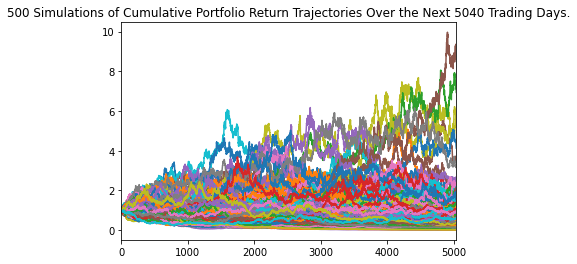

In [34]:
# Plot simulation outcomes`

MC_Twenty.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

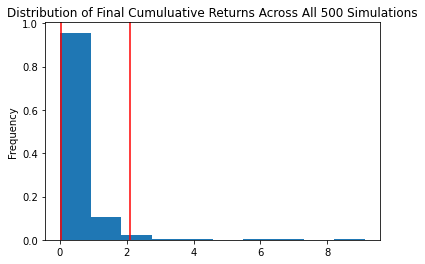

In [35]:
# Plot probability distribution and confidence intervals

MC_Twenty.plot_distribution()

### Analysis

In [36]:
# Fetch summary statistics from the Monte Carlo simulation results

summary_stats = MC_Twenty.summarize_cumulative_return()
summary_stats

count           500.000000
mean              0.502784
std               0.779887
min               0.012129
25%               0.143937
50%               0.286937
75%               0.550096
max               9.125993
95% CI Lower      0.035732
95% CI Upper      2.086562
Name: 5040, dtype: float64

### Calculate Returns at the 95% lower and upper confidence intervals based on a $10,000 initial investment

In [37]:
# Set initial investment

initial_investment = 10000

# Use the lower and upper 95% confidence intervals to calculate the range of the possible outcomes of the initial investment

ci_lower = round(summary_stats[8]*initial_investment,2)
ci_upper = round(summary_stats[9]*initial_investment,2)

#Print results

print(f"There is a 95% chance that an initial investment of ${initial_investment} in the Commodities"
      f" over the next 20 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $10000 in the Commodities over the next 20 years will end within in the range of $357.32 and $20865.62
